In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn-poster')

In [2]:
df = pd.read_excel('Datos/todoslosmeses.xlsx', date_parser=True)

In [3]:
df.head()

,hora,fecha,coedisp,abso,albedo,extinc,cn
0,00:02:00,2017-01-01,19.2,3.51,0.845443,22.71,0.746809
1,00:03:00,2017-01-01,18.8,3.59,0.839661,22.39,0.763830
2,00:04:00,2017-01-01,25.8,4.03,0.864901,29.83,0.857447
3,00:05:00,2017-01-01,20.3,3.82,0.841625,24.12,0.812766
4,00:06:00,2017-01-01,19.7,3.94,0.833333,23.64,0.838298


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241954 entries, 0 to 241953
Data columns (total 7 columns):
 #   Column   Non-Null Count   Dtype         
---  ------   --------------   -----         
 0   hora     241954 non-null  object        
 1   fecha    241954 non-null  datetime64[ns]
 2   coedisp  240958 non-null  float64       
 3   abso     228263 non-null  float64       
 4   albedo   227617 non-null  float64       
 5   extinc   227617 non-null  float64       
 6   cn       228263 non-null  float64       
dtypes: datetime64[ns](1), float64(5), object(1)
memory usage: 12.9+ MB


## A. valores máximos por día de carbono negro

In [5]:
# filtrado
idx = df.groupby('fecha').cn.idxmax()

In [6]:
df.iloc[idx][['fecha','cn']].head()

,fecha,cn
196,2017-01-01,4.02128
1787,2017-01-02,4.55319
3161,2017-01-03,5.42553
4479,2017-01-04,9.76596
5819,2017-01-05,6.38298


## B. ¿A qué hora coinciden más registros en que hay mayor cn en el ambiente? Gráfica ¿Hay un insight que quieras hacer referencia?

In [7]:
# tratamiento de datos
df['hora_str'] = df.hora.astype(str)
df['la_hora'] = df.hora_str.str.split(":").str[0]

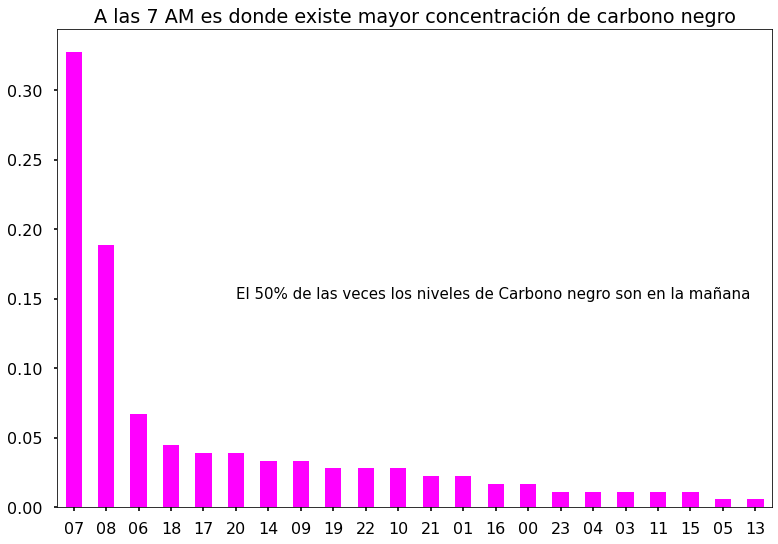

In [8]:
# graficado
df.iloc[idx].la_hora.value_counts(normalize=True).plot.bar(rot=0, color='magenta')
plt.title('A las 7 AM es donde existe mayor concentración de carbono negro')
plt.text(5,0.15,'El 50% de las veces los niveles de Carbono negro son en la mañana', fontsize=15);

# nulos hay por columna

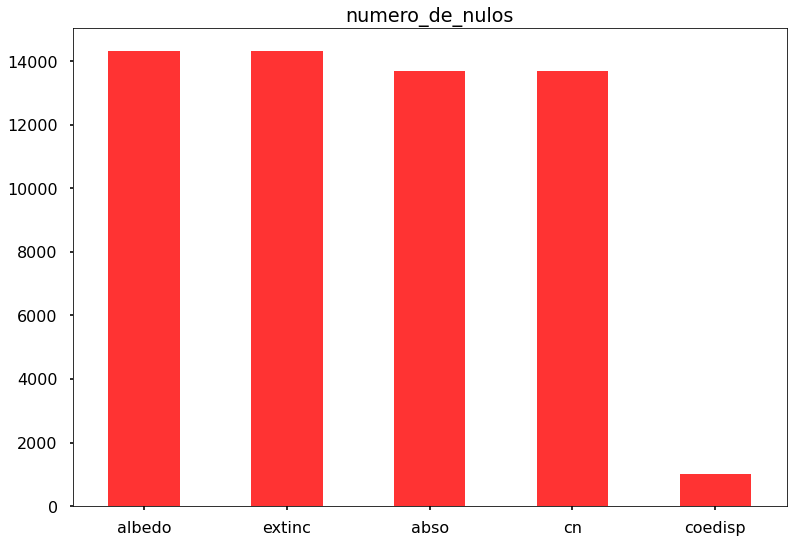

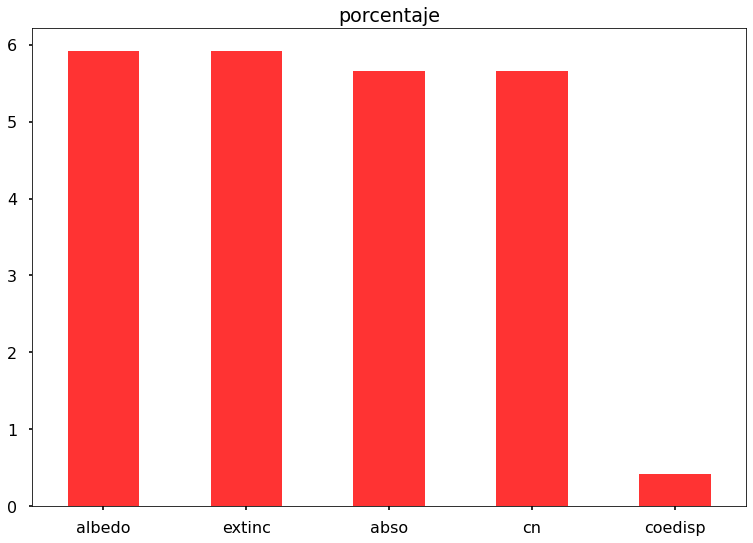

In [9]:
# tratamiento de nulos, que hacer y que significan
# rellenando nulos
nulos = pd.DataFrame(df.isnull().sum())
nulos.columns = ['numero_de_nulos']
#se crea columna
nulos['porcentaje'] = nulos.numero_de_nulos/df.shape[0] * 100
nul_bueno = nulos[nulos.numero_de_nulos != 0]
# se grafica
for i in nul_bueno.columns:
    plt.subplots()
    nul_bueno[i].sort_values(ascending=False).plot.bar(rot = 0, color='red', alpha=0.8, title=i)

### Comportamiento del carbono negro por mes y hora.

#### Mes en que mejoró la calidad del promedio de aire

In [10]:
df['el_mes'] = df.fecha.dt.month

A. En el mes 6 mejoro la calidad del aire


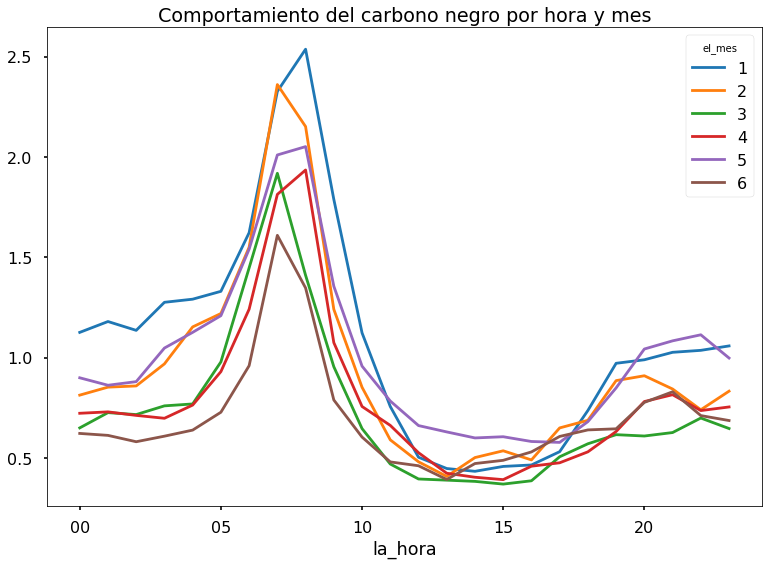

In [11]:
# para resolver A
df_mes_hora = df.groupby(['el_mes', 'la_hora']).cn.mean().unstack(0)
# Para resolver B
df_hora_mes = df.groupby(['el_mes', 'la_hora']).cn.mean().unstack(1)

df_mes_hora.plot(title='Comportamiento del carbono negro por hora y mes')
#plt.xticks(range(24),df.la_hora.unique());
print("A. En el mes %i mejoro la calidad del aire" % df_mes_hora.mean().idxmin())

#### rango de horas es la ideal para hacer actividades al aire libre y no respirar la mayor cantidad de carbono negro

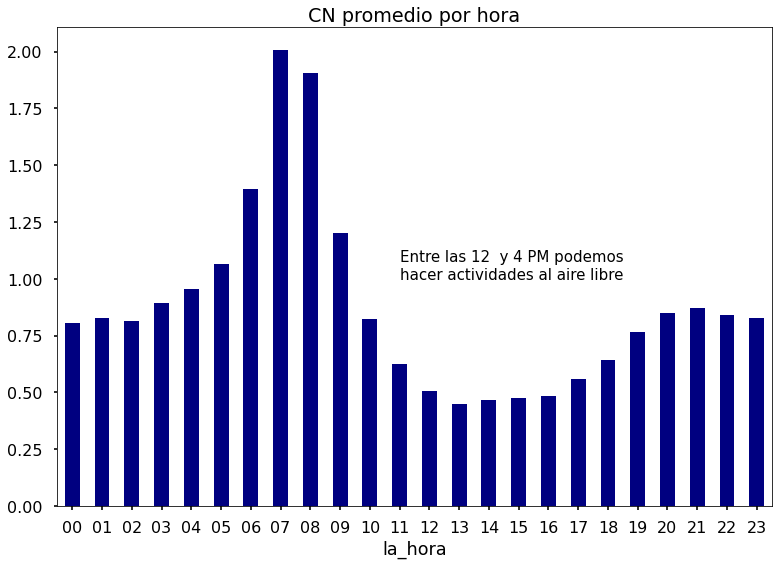

In [12]:
df_hora_mes.mean().plot.bar(rot=0,color='navy', title='CN promedio por hora')
plt.text(11,1,"""Entre las 12  y 4 PM podemos 
hacer actividades al aire libre""", fontsize=15);

#### Las métricas usadas para medir la calidad del aire en este dataset son: coedisp, abso, albedo, extinc y cn. ¿El comportamiento de estas metricas es distinto los fines de semana que durante la semana?


In [13]:
# The day of the week with Monday=0, Sunday=6.
dict_dia = {0: 'lunes', 1:'martes', 2:'miercoles',3:'jueves',4:'viernes',5:'sabado',6:'domingo'}
df['dia'] = [dict_dia.get(i) for i in df.fecha.dt.weekday.values]

In [14]:
df['fin_de_semana'] = np.where(df.dia.isin(['sabado', 'domingo']),1,0)

In [16]:
import plotly
import cufflinks

In [17]:
df

,hora,fecha,coedisp,abso,albedo,extinc,cn,hora_str,la_hora,el_mes,dia,fin_de_semana
0,00:02:00,2017-01-01,19.200,3.51,0.845443,22.710,0.746809,00:02:00,00,1,domingo,1
1,00:03:00,2017-01-01,18.800,3.59,0.839661,22.390,0.763830,00:03:00,00,1,domingo,1
2,00:04:00,2017-01-01,25.800,4.03,0.864901,29.830,0.857447,00:04:00,00,1,domingo,1
3,00:05:00,2017-01-01,20.300,3.82,0.841625,24.120,0.812766,00:05:00,00,1,domingo,1
4,00:06:00,2017-01-01,19.700,3.94,0.833333,23.640,0.838298,00:06:00,00,1,domingo,1
...,...,...,...,...,...,...,...,...,...,...,...,...
241949,23:56:00,2017-06-30,1.430,2.08,0.407407,3.510,0.442553,23:56:00,23,6,viernes,0
241950,23:57:00,2017-06-30,0.681,1.80,0.274486,2.481,0.382979,23:57:00,23,6,viernes,0
241951,23:58:00,2017-06-30,1.560,2.08,0.428571,3.640,0.442553,23:58:00,23,6,viernes,0
241952,23:59:00,2017-06-30,2.060,1.96,0.512438,4.020,0.417021,23:59:00,23,6,viernes,0


<AxesSubplot:xlabel='fin_de_semana'>

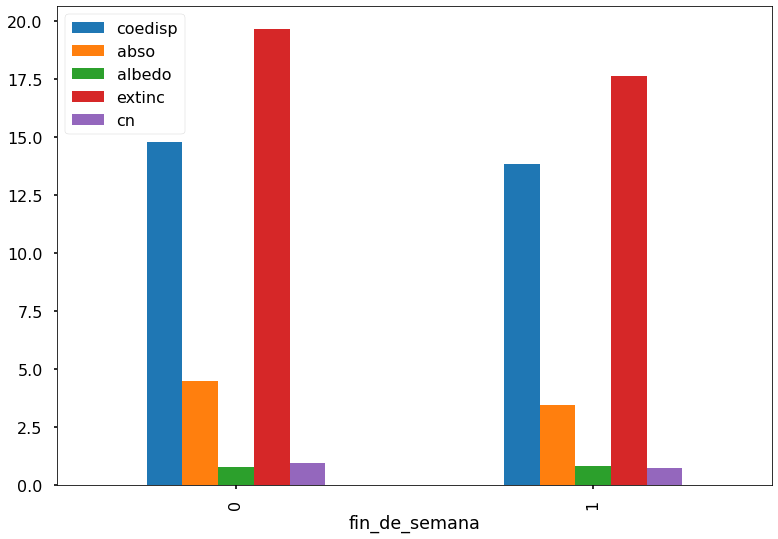

In [18]:
cols = ['coedisp', 'abso', 'albedo', 'extinc', 'cn']
df.groupby('fin_de_semana')[cols].mean().plot(kind='bar')

### Si son distintos

¿Qué dia hay mayor cantidad de cn?

Text(0.5, 0, 'CN promedio por dia')

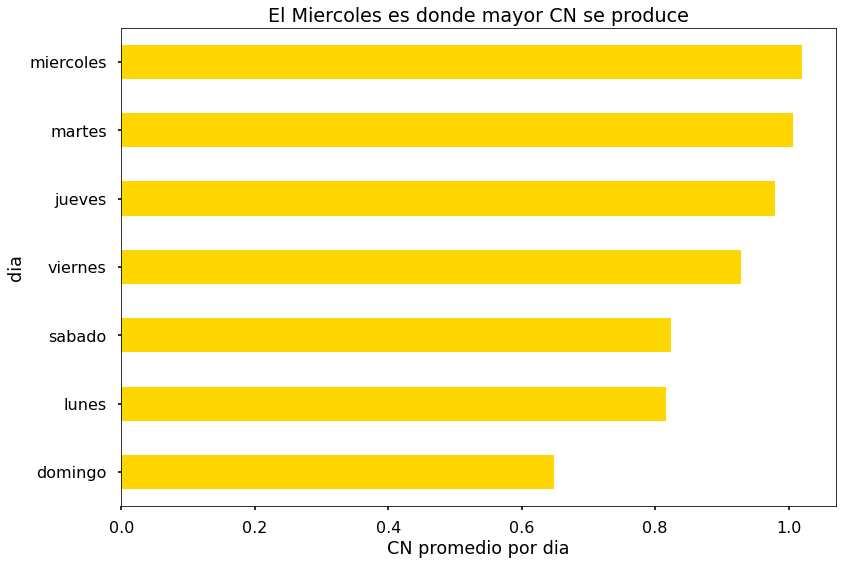

In [19]:
df.groupby('dia').cn.mean().sort_values().plot.barh(color='gold', title='El Miercoles es donde mayor CN se produce')
plt.xlabel('CN promedio por dia')

In [20]:
# A.valores donde se tiene un valor de carbono negro mayor al cuantil 69.
df_quant = df[df.cn > df.cn.quantile(0.69)]
df_quant.head()

,hora,fecha,coedisp,abso,albedo,extinc,cn,hora_str,la_hora,el_mes,dia,fin_de_semana
42,00:47:00,2017-01-01,21.7,5.68,0.792549,27.38,1.208510,00:47:00,00,1,domingo,1
43,00:48:00,2017-01-01,24.7,6.79,0.784376,31.49,1.444680,00:48:00,00,1,domingo,1
44,00:49:00,2017-01-01,22.2,4.62,0.827740,26.82,0.982979,00:49:00,00,1,domingo,1
45,00:50:00,2017-01-01,21.2,5.93,0.781423,27.13,1.261700,00:50:00,00,1,domingo,1
46,00:51:00,2017-01-01,19.5,5.82,0.770142,25.32,1.238300,00:51:00,00,1,domingo,1


In [21]:
# B.  número de datos que perdidos
df.shape[0] - (df.shape[0] - df_quant.shape[0])

70708

In [22]:
# C. porcentaje de datos que perdidos
round(100 - ((df.shape[0] - df_quant.shape[0]) / df.shape[0]) * 100, 3)

29.224

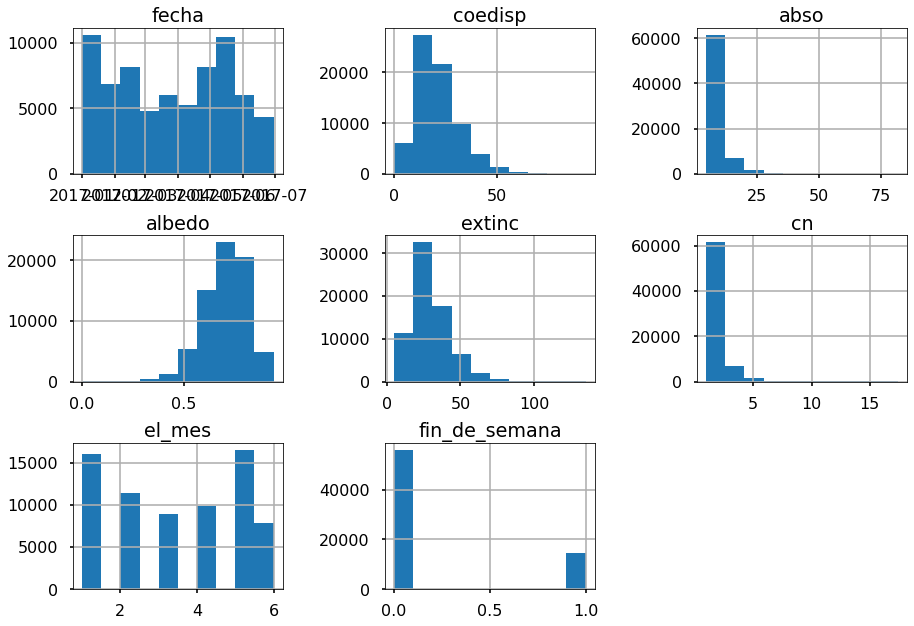

In [23]:
# D.  histogramas filtrando
df_quant.hist()
plt.tight_layout();

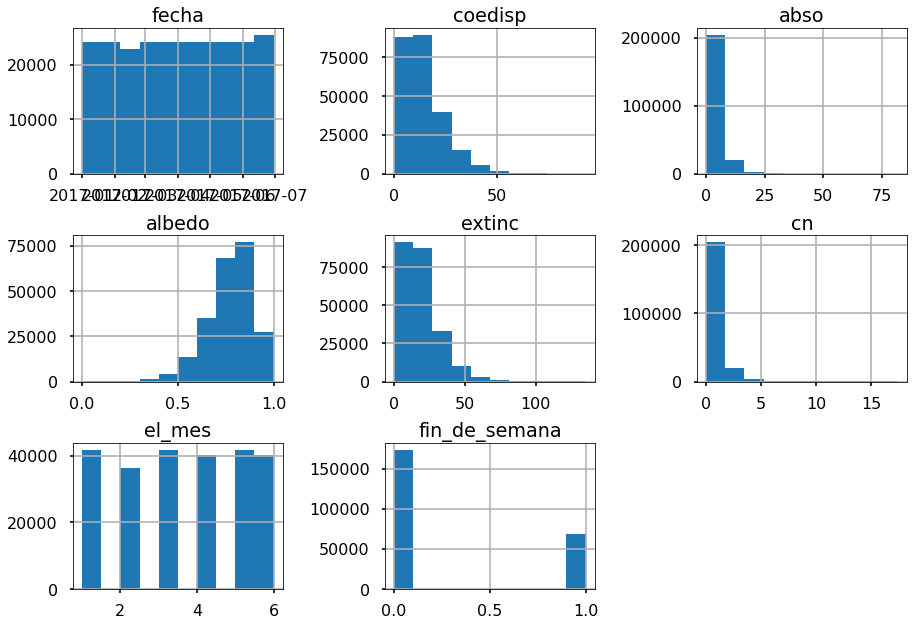

In [24]:
# D.histogramas sin filtrar 
df.hist()
plt.tight_layout();